## The purpose of the analysis is to explore the Senheng products with the customer's reviews which are scraped from Senheng webpage.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Import the data and data cleaning

In [2]:
product_info = pd.read_csv('senheng_home_entertainment.csv')

### Check the column data format and any missing value

In [3]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_Name  252 non-null    object 
 1   Brand         252 non-null    object 
 2   Category      252 non-null    object 
 3   Status        252 non-null    object 
 4   Price_RM      252 non-null    float64
 5   Rating        252 non-null    float64
 6   Comment       252 non-null    object 
 7   Comment_num   252 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 15.9+ KB


In [4]:
# filter out the sample with comments
pd_with_comment = product_info[product_info['Comment_num'] > 0]
pd_with_comment = pd_with_comment.sort_values('Comment_num')

### Let's check how many products contain the reviews.

Text(0.5, 0, 'Review count')

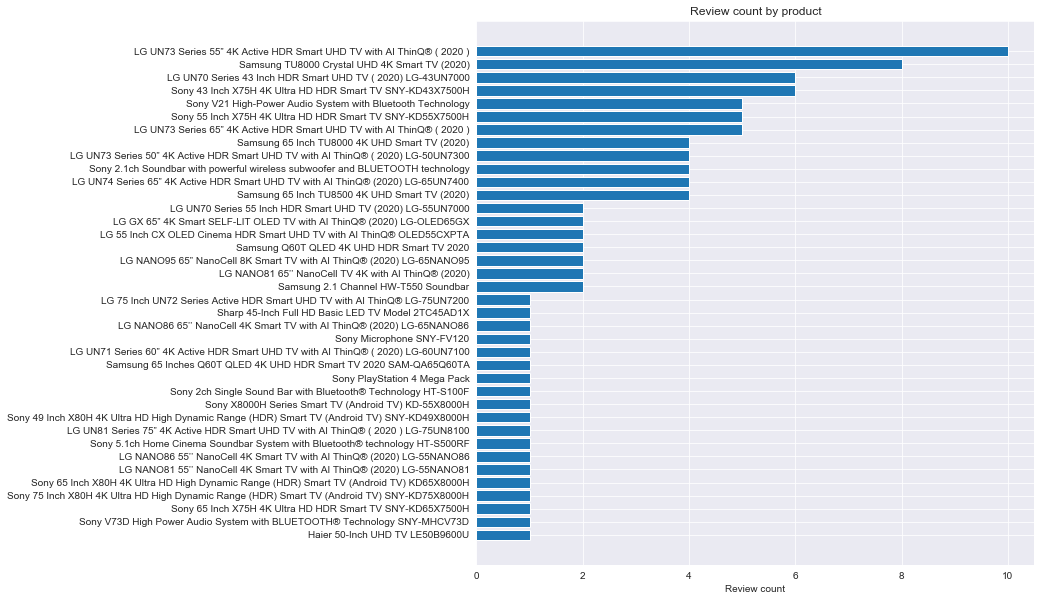

In [5]:
name = pd_with_comment['Product_Name']
value = pd_with_comment['Comment_num']
print(len(pd_with_comment), "products")
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
plt.barh(y=name, width=value)
plt.title('Review count by product')
plt.xlabel('Review count')

### Let's check the overall rating distribution.

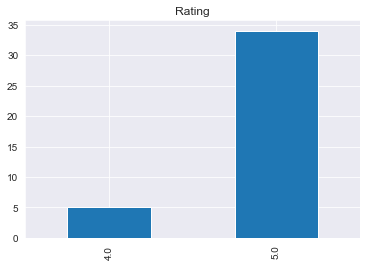

In [6]:
pd_with_comment['Rating'].value_counts().sort_index().plot(kind='bar', title='Rating')

### The overall rating for each product.

Text(0.5, 0, 'Rating')

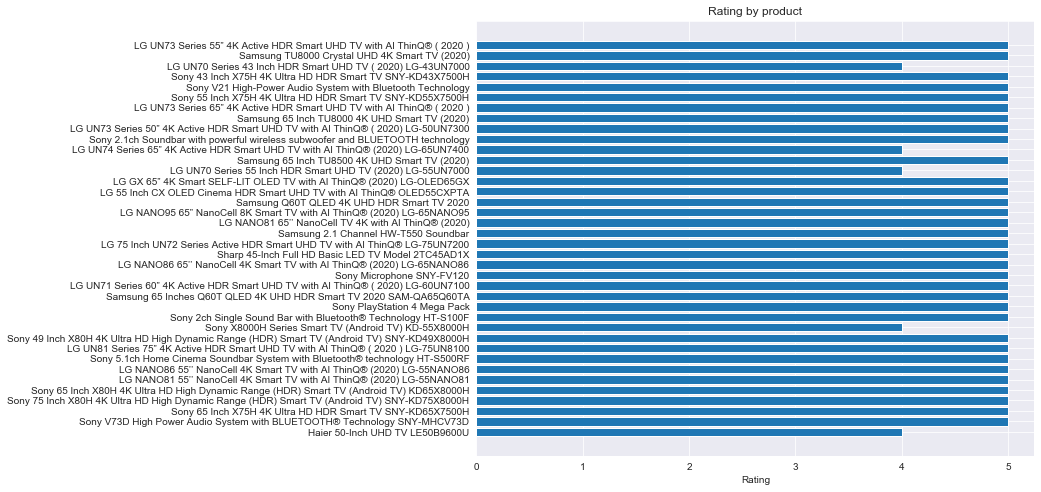

In [7]:
name = pd_with_comment['Product_Name']
value = pd_with_comment['Rating']

sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
plt.barh(y=name, width=value)
plt.title('Rating by product')
plt.xlabel('Rating')

In [8]:
ave_rating = pd_with_comment['Rating'].sum()/len(pd_with_comment)

### From the graph below, the average rating is very high. Maybe the reviews and rating are insufficient for analysis.

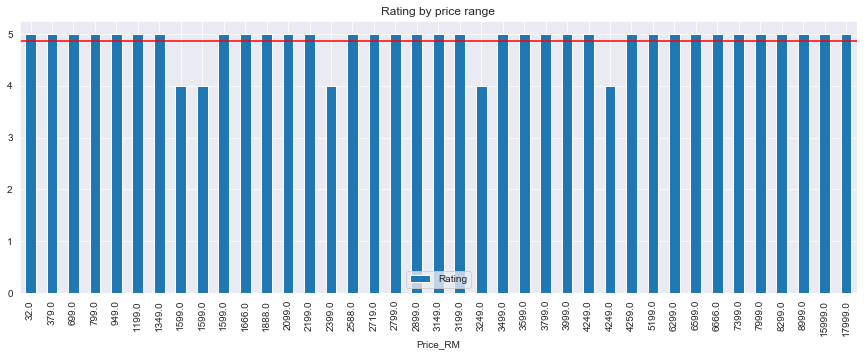

In [9]:
pd_with_comment.sort_values('Price_RM').plot(x='Price_RM', y='Rating', kind='bar', figsize=(15,5), title='Rating by price range')
plt.axhline(y=ave_rating, color='r', linestyle='-')

### From the review, we can estimate how the sale is going on. LG is the most popular brand at the online shop.

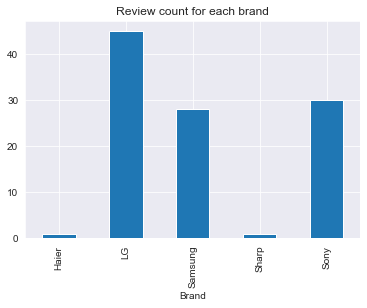

In [10]:
pd_with_comment.groupby('Brand')['Comment_num'].sum().plot(kind='bar', title='Review count for each brand')

### This is the analysis of product category. We can find that the customers buying the most product is TV.

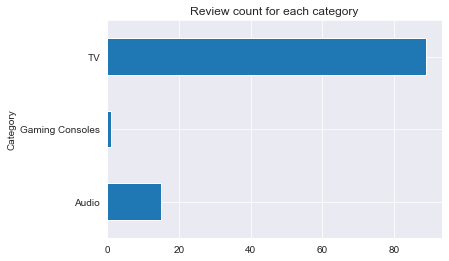

In [12]:
pd_with_comment.groupby('Category')['Comment_num'].sum().plot(kind='barh', title='Review count for each category')

### Wow, all products here show the high rating.

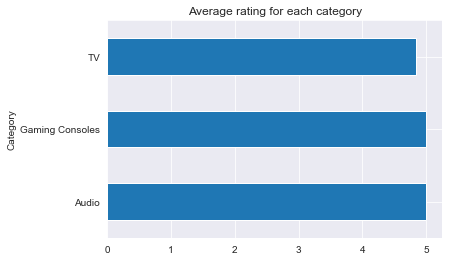

In [13]:
pd_with_comment.groupby('Category')['Rating'].mean().plot(kind='barh', title='Average rating for each category')

### Remove # hashtag from the reviews.

In [16]:
# def remove_hashtag(text):
#     text = re.sub(r'#', '', text)
#     return text

In [17]:
# pd_with_comment['Comment'] = pd_with_comment['Comment'].apply(remove_hashtag)

### Let's see which word is mentioned the most in the reviews

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [31]:
stopwords = set(STOPWORDS) | {'senheng', '31Anniver', '31Anniversary', "31Anniversary'", "SenhengKOC'", "SenhengKOC", '31Anniv', 'dtype', 'undefined'}

In [32]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

###  It seems there are a lot of postive conversations around TV, service, staff, warranty.

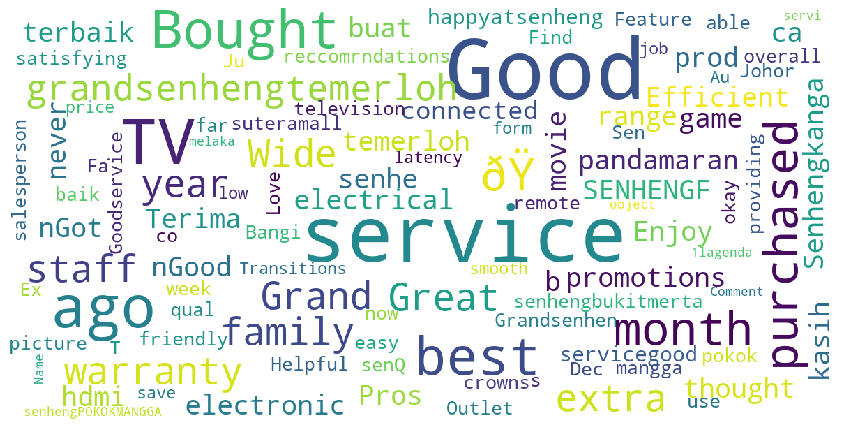

In [33]:
show_wordcloud(pd_with_comment['Comment'])

### For LG product, the customers give the good reviews on the TV.

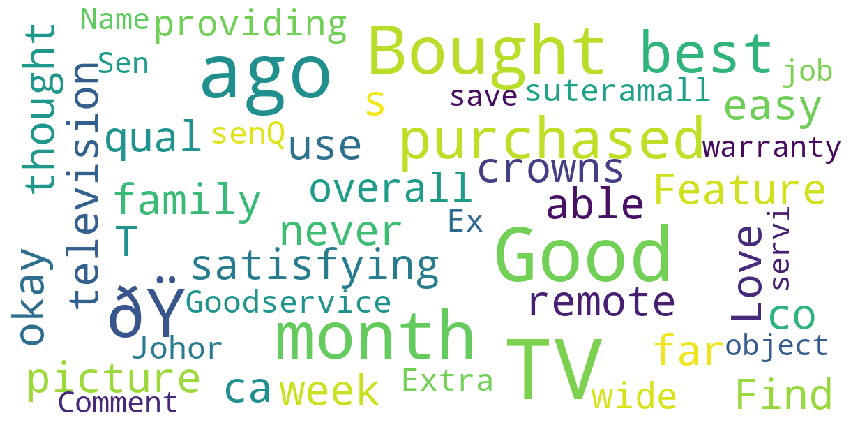

In [34]:
show_wordcloud(pd_with_comment[pd_with_comment['Brand'] == 'LG']['Comment'])

### The electronic and electrical are really stand out for Sony product.

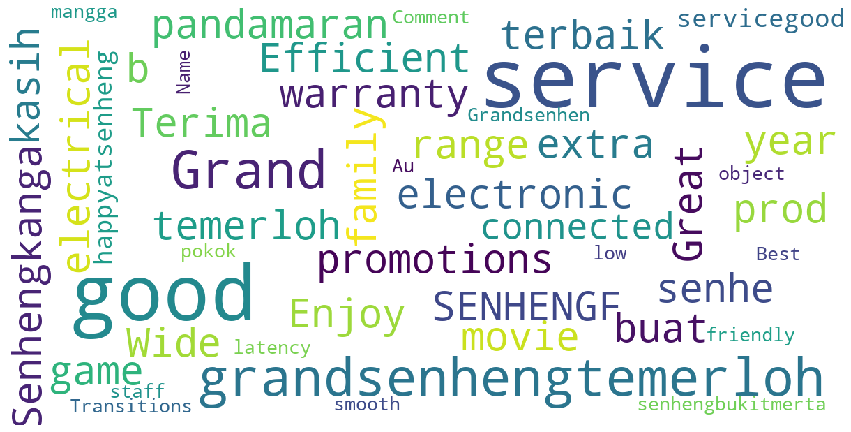

In [35]:
show_wordcloud(pd_with_comment[pd_with_comment['Brand'] == 'Sony']['Comment'])

### Samsung also good in TV product and customers are satisfied with the customer service.

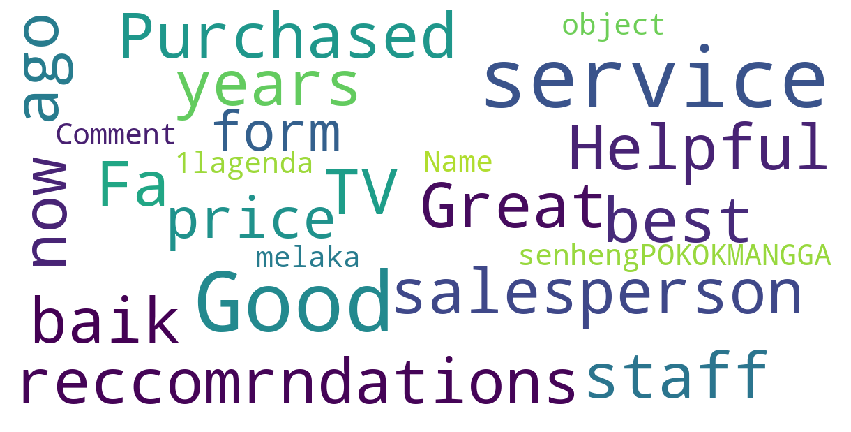

In [36]:
show_wordcloud(pd_with_comment[pd_with_comment['Brand'] == 'Samsung']['Comment'])

## Recommendation

#### In this analysis, the sample is insufficient to find out the optimum solutions to improve the sale. But, there are some useful informations such as the best sale product is TV at the online shop, customers are satisfied with the customer service and the popular brand is LG and followed by Sony and Samsung.

* Promote more on LG product since it's the most popular brand.
* Introduce a promotion like a combination with the TV, Audio or Accessories to push the sale.
* Reduce the number of order of less popular brand/product.

### Further development:
#### 1. Developing the NLP model 
#### 2. Improving model performance by tuning the model hyperparameters
#### 3. Increasing the prediction accuracy with deep learning model such as RNN model